In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta
from scipy.interpolate import CubicSpline

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 10, 5

In [2]:
#Reading the treasury data for 14th April, 2020
date = pd.read_excel('C:/Users/titas/Desktop/Classes/Fixed Income and Interest Rate Derivatives/Finals/treasurydata.xlsx')
date.index = range(70)
date['Date']=pd.to_datetime(date['Date'])
# date = date.set_index('Date')
date

,Date,1,2,3,6,12,24,36,60,84,120,240,360
0,2020-01-02,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1,2020-01-03,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
2,2020-01-06,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
3,2020-01-07,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
4,2020-01-08,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35
5,2020-01-09,1.53,1.55,1.54,1.56,1.54,1.58,1.59,1.65,1.77,1.85,2.17,2.38
6,2020-01-10,1.52,1.55,1.54,1.55,1.53,1.56,1.59,1.63,1.74,1.83,2.14,2.28
7,2020-01-13,1.54,1.56,1.57,1.57,1.53,1.58,1.60,1.65,1.76,1.85,2.16,2.30
8,2020-01-14,1.53,1.56,1.57,1.57,1.53,1.58,1.59,1.63,1.74,1.82,2.12,2.27
9,2020-01-15,1.53,1.56,1.57,1.58,1.54,1.56,1.56,1.60,1.71,1.79,2.09,2.23


In [3]:
def yield_fwd(df):
#     df=date.iloc[0][:]
    df = df.reset_index()
    dt = str(df.iloc[0][1].date())
    df = df.iloc[1:][:]
    df=df.rename(columns={'index': 'Tenor', df.columns[1]: 'Yields'})
       
    tenor = np.array(df['Tenor']).astype(int)
    yields = np.array(df['Yields']).astype(float)

#     plt.xlabel('Time to Maturity (in months)')
#     plt.ylabel('Yields (%)')
#     plt.plot(tenor, yields, 'o', label = 'yield data points')
#     plt.title('Yield Points\nDate: '+ dt, fontsize = 15)
#     plt.legend()
#     plt.grid(linestyle = '--', linewidth = 1)

    cs = CubicSpline(tenor, yields, bc_type='natural')
    curve_points = np.linspace(min(tenor), max(tenor), 10000)
   
#     plt.figure()
#     plt.title('Yield & Instantaneous Forward Curve from Cubic Spline\nDate:'+ dt, fontsize = 15)
#     plt.xlabel('Time to Maturity (in months)')
#     plt.ylabel('Yields (%)')
#     plt.plot(tenor, yields, 'o', label = 'yield data points')
#     plt.plot(curve_points, cs(curve_points), label="Spot Rate")
#     plt.plot(curve_points, (cs(curve_points) + curve_points*cs(curve_points, 1)), label=" Instantaneous Forward Rate")
#     plt.grid(linestyle = '--', linewidth = 1)
#     plt.legend()
#     plt.show()
    
    return cs

Plotting for 3 dates

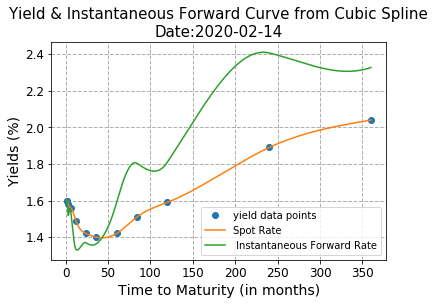

In [9]:
# cs = yield_fwd(date.iloc[20][:])
# cs = yield_fwd(date.iloc[39][:])
# cs = yield_fwd(date.iloc[61][:])

In [26]:
bonds = pd.read_excel('C:/Users/titas/Desktop/Classes/Fixed Income and Interest Rate Derivatives/Finals/bonds.xlsx')
bonds.index = range(17)
bonds.head()

,Maturity,Coupon,Conver Factor
0,2027-02-15,2.250,0.8006
1,2026-12-31,1.750,0.7740
2,2027-01-31,1.500,0.7607
3,2027-02-28,1.125,0.7408
4,2027-05-15,2.375,0.8012


In [28]:

index = date['Date']
bond_prices = pd.DataFrame(index=index,columns=['2/15/2027','12/31/2026','1/31/2027','2/28/2027','5/15/2027',
                                    '8/15/2027','3/31/2027','11/15/2027','2/15/2028','5/15/2028','8/15/2028',
                                    '11/15/2028','2/15/2029','5/15/2029','8/15/2029','11/15/2029','2/15/2030'])
bond_prices = bond_prices.fillna(0.0)

for a in range(0,70):
    date_today = bond_prices.index[a]
    cs = yield_fwd(date.iloc[a][:])
    for i, j in bonds.iterrows():     
        price = 0
        first_coupon = j[0].replace(year=2020)
        if first_coupon < date_today:
            first_coupon = first_coupon+relativedelta(months=+6)
        coupon = j[1]/2
        while j[0] >= first_coupon:
            mon_diff =  first_coupon - date_today 
            spot = cs(mon_diff.days/30).item(0)
            if (j[0] >= (first_coupon+relativedelta(days=-3))) and (j[0] <= (first_coupon+relativedelta(days=+3))):
                coupon = coupon + 100
            price = price + coupon/((1 + spot/100)**(mon_diff.days/365))
            first_coupon = first_coupon+relativedelta(months=+6)
        bond_prices.iloc[a][i]= price  
bond_prices

,2/15/2027,12/31/2026,1/31/2027,2/28/2027,5/15/2027,8/15/2027,3/31/2027,11/15/2027,2/15/2028,5/15/2028,8/15/2028,11/15/2028,2/15/2029,5/15/2029,8/15/2029,11/15/2029,2/15/2030
Date,,,,,,,,,,,,,,,,,
2020-01-02,103.953953,98.945189,98.739472,95.935597,104.314182,102.904284,92.247324,102.379149,108.059855,108.512629,107.965372,109.377813,107.541984,104.828925,97.769890,98.348500,97.173070
2020-01-03,104.487812,99.464371,99.258374,96.451303,104.863013,103.464846,92.757680,102.954963,108.663704,109.137438,108.609433,110.048672,108.219933,105.519691,98.457487,99.059754,97.895209
2020-01-06,104.438064,99.414840,99.210408,96.404928,104.813688,103.416287,92.713139,102.905759,108.611673,109.082453,108.551672,109.986357,108.155593,105.451658,98.387889,98.984755,97.816522
2020-01-07,104.315684,99.295464,99.089933,96.283733,104.686742,103.285060,92.591454,102.770186,108.470462,108.936558,108.401195,109.830408,107.997317,105.290240,98.225716,98.817572,97.646352
2020-01-08,104.050763,99.039321,98.834398,96.030444,104.413477,103.005804,92.341815,102.483100,108.168410,108.623923,108.079150,109.494677,107.659779,104.947184,97.886100,98.465885,97.289750
2020-01-09,104.126367,99.111827,98.906570,96.101756,104.492793,103.089260,92.411936,102.572767,108.268257,108.733449,108.199089,109.627682,107.802621,105.101576,98.049471,98.644499,97.481207
2020-01-10,104.325312,99.306448,99.101280,96.295477,104.695139,103.292752,92.603866,102.777077,108.476112,108.941637,108.406074,109.834863,108.003486,105.297574,98.235399,98.828398,97.659591
2020-01-13,104.212274,99.195530,98.990871,96.185885,104.579658,103.175139,92.495451,102.656216,108.349348,108.809633,108.268971,109.690882,107.856535,105.146120,98.082690,98.669078,97.496446
2020-01-14,104.351602,99.329389,99.125925,96.321308,104.726708,103.330095,92.630868,102.820727,108.527455,108.999991,108.471947,109.909003,108.085020,105.386373,98.330695,98.932354,97.771338


In [30]:
bond_prices.to_excel('C:/Users/titas/Desktop/Classes/Fixed Income and Interest Rate Derivatives/Finals/bondmatrix1.xlsx')